<a href="https://colab.research.google.com/github/Shraddha192001/CAR/blob/main/chapter_appendix-tools-for-deep-learning/jupyter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Jupyter Notebooks
:label:`sec_jupyter`


This section describes how to edit and run the code
in each section of this book
using the Jupyter Notebook. Make sure you have
installed Jupyter and downloaded the
code as described in
:ref:`chap_installation`.
If you want to know more about Jupyter see the excellent tutorial in
their [documentation](https://jupyter.readthedocs.io/en/latest/).


## Editing and Running the Code Locally

Suppose that the local path of the book's code is `xx/yy/d2l-en/`. Use the shell to change the directory to this path (`cd xx/yy/d2l-en`) and run the command `jupyter notebook`. If your browser does not do this automatically, open http://localhost:8888 and you will see the interface of Jupyter and all the folders containing the code of the book, as shown in :numref:`fig_jupyter00`.

![The folders containing the code of this book.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter00.png?raw=1)
:width:`600px`
:label:`fig_jupyter00`


You can access the notebook files by clicking on the folder displayed on the webpage.
They usually have the suffix ".ipynb".
For the sake of brevity, we create a temporary "test.ipynb" file.
The content displayed after you click it is
shown in :numref:`fig_jupyter01`.
This notebook includes a markdown cell and a code cell. The content in the markdown cell includes "This Is a Title" and "This is text.".
The code cell contains two lines of Python code.

![Markdown and code cells in the "text.ipynb" file.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter01.png?raw=1)
:width:`600px`
:label:`fig_jupyter01`


Double click on the markdown cell to enter edit mode.
Add a new text string "Hello world." at the end of the cell, as shown in :numref:`fig_jupyter02`.

![Edit the markdown cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter02.png?raw=1)
:width:`600px`
:label:`fig_jupyter02`


As demonstrated in :numref:`fig_jupyter03`,
click "Cell" $\rightarrow$ "Run Cells" in the menu bar to run the edited cell.

![Run the cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter03.png?raw=1)
:width:`600px`
:label:`fig_jupyter03`

After running, the markdown cell is shown in :numref:`fig_jupyter04`.

![The markdown cell after running.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter04.png?raw=1)
:width:`600px`
:label:`fig_jupyter04`


Next, click on the code cell. Multiply the elements by 2 after the last line of code, as shown in :numref:`fig_jupyter05`.

![Edit the code cell.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter05.png?raw=1)
:width:`600px`
:label:`fig_jupyter05`


You can also run the cell with a shortcut ("Ctrl + Enter" by default) and obtain the output result from :numref:`fig_jupyter06`.

![Run the code cell to obtain the output.](https://github.com/d2l-ai/d2l-en-colab/blob/master/img/jupyter06.png?raw=1)
:width:`600px`
:label:`fig_jupyter06`


When a notebook contains more cells, we can click "Kernel" $\rightarrow$ "Restart & Run All" in the menu bar to run all the cells in the entire notebook. By clicking "Help" $\rightarrow$ "Edit Keyboard Shortcuts" in the menu bar, you can edit the shortcuts according to your preferences.

## Advanced Options

Beyond local editing two things are quite important: editing the notebooks in the markdown format and running Jupyter remotely.
The latter matters when we want to run the code on a faster server.
The former matters since Jupyter's native ipynb format stores a lot of auxiliary data that is
irrelevant to the content,
mostly related to how and where the code is run.
This is confusing for Git, making
reviewing contributions very difficult.
Fortunately there is an alternative---native editing in the markdown format.

### Markdown Files in Jupyter

If you wish to contribute to the content of this book, you need to modify the
source file (md file, not ipynb file) on GitHub.
Using the notedown plugin we
can modify notebooks in the md format directly in Jupyter.


First, install the notedown plugin, run the Jupyter Notebook, and load the plugin:

```
pip install d2l-notedown  # You may need to uninstall the original notedown.
jupyter notebook --NotebookApp.contents_manager_class='notedown.NotedownContentsManager'
```

You may also turn on the notedown plugin by default whenever you run the Jupyter Notebook.
First, generate a Jupyter Notebook configuration file (if it has already been generated, you can skip this step).

```
jupyter notebook --generate-config
```

Then, add the following line to the end of the Jupyter Notebook configuration file (for Linux or macOS, usually in the path `~/.jupyter/jupyter_notebook_config.py`):

```
c.NotebookApp.contents_manager_class = 'notedown.NotedownContentsManager'
```

After that, you only need to run the `jupyter notebook` command to turn on the notedown plugin by default.

### Running Jupyter Notebooks on a Remote Server

Sometimes, you may want to run Jupyter notebooks on a remote server and access it through a browser on your local computer. If Linux or macOS is installed on your local machine (Windows can also support this function through third-party software such as PuTTY), you can use port forwarding:

```
ssh myserver -L 8888:localhost:8888
```

The above string `myserver` is the address of the remote server.
Then we can use http://localhost:8888 to access the remote server `myserver` that runs Jupyter notebooks. We will detail on how to run Jupyter notebooks on AWS instances
later in this appendix.

### Timing

We can use the `ExecuteTime` plugin to time the execution of each code cell in Jupyter notebooks.
Use the following commands to install the plugin:

```
pip install jupyter_contrib_nbextensions
jupyter contrib nbextension install --user
jupyter nbextension enable execute_time/ExecuteTime
```

## Summary

* Using the Jupyter Notebook tool, we can edit, run, and contribute to each section of the book.
* We can run Jupyter notebooks on remote servers using port forwarding.


## Exercises

1. Edit and run the code in this book with the Jupyter Notebook on your local machine.
1. Edit and run the code in this book with the Jupyter Notebook *remotely* via port forwarding.
1. Compare the running time of the operations $\mathbf{A}^\top \mathbf{B}$ and $\mathbf{A} \mathbf{B}$ for two square matrices in $\mathbb{R}^{1024 \times 1024}$. Which one is faster?


[Discussions](https://discuss.d2l.ai/t/421)


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load your file
df = pd.read_csv("/content/multi_asset_market_data.csv")

# Convert Date
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# Choose asset column (Change as needed)
asset = 'AAPL_Close'      # Example
series = df[['Date', asset]].dropna()

# Create time-series index
series = series.set_index('Date')

# Convert to numeric
series[asset] = pd.to_numeric(series[asset], errors='coerce')
series = series.dropna()

# Log returns (for GARCH)
series['log_ret'] = np.log(series[asset]).diff()
series = series.dropna()

print(series.head())


ParserError: Error tokenizing data. C error: Expected 10 fields in line 37262, saw 15


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load your file
df = pd.read_csv("/content/multi_asset_market_data.csv", on_bad_lines='skip')

# Convert Date
df['date'] = pd.to_datetime(df['date'], format='mixed', dayfirst=False, errors='coerce')
df = df.sort_values('date')

# Choose asset column (Change as needed)
asset = 'final_price'      # Corrected: Using 'final_price' as the asset column

# Clean and convert 'final_price' to numeric
df[asset] = df[asset].astype(str).str.replace('$', '', regex=False)
df[asset] = pd.to_numeric(df[asset], errors='coerce')

series = df[['date', asset]].dropna()

# Create time-series index
series = series.set_index('date')

# Convert to numeric (already done, but keeping for consistency if other assets are chosen)
series[asset] = pd.to_numeric(series[asset], errors='coerce')
series = series.dropna()

# Log returns (for GARCH)
series['log_ret'] = np.log(series[asset]).diff()
series = series.dropna()

print(series.head())

            final_price   log_ret
date                             
2000-08-30       273.90 -0.016404
2000-08-30       273.90  0.000000
2000-08-30         4.94 -4.015398
2000-08-30         4.93 -0.002026
2000-08-30       278.43  4.033828


/tmp/ipython-input-909275594.py:7: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/multi_asset_market_data.csv", on_bad_lines='skip')


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            final_price   No. Observations:                77643
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -850409.688
Date:                Sun, 16 Nov 2025   AIC                        1700825.377
Time:                        10:38:53   BIC                        1700853.156
Sample:                             0   HQIC                       1700833.904
                              - 77643                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0121      0.002     -7.677      0.000      -0.015      -0.009
ma.L1         -0.9963      0.000  -6866.851      0.000      -0.997      -0.996
sigma2       1.91e+08   3.62e-13   5.28e+20      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


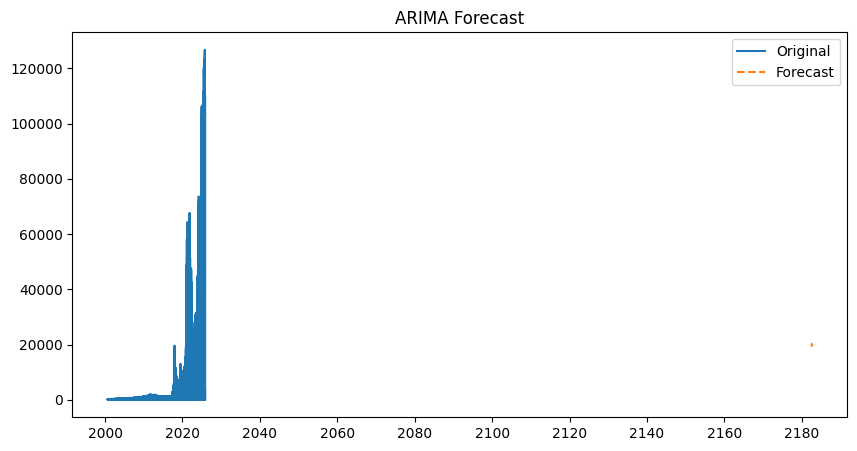

In [9]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# ARIMA Model
model = ARIMA(series[asset], order=(1,1,1))
fit = model.fit()

print(fit.summary())

# Forecast 30 days
forecast = fit.forecast(30)
print("\nARIMA Forecast:\n", forecast)

# Plot
plt.figure(figsize=(10,5))
plt.plot(series[asset], label="Original")
plt.plot(forecast, label="Forecast", linestyle='--')
plt.legend()
plt.title("ARIMA Forecast")
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.3/981.3 kB 17.8 MB/s eta 0:00:00
Iteration:      1,   Func. Count:      6,   Neg. LLF: 23647975483.1123
Iteration:      2,   Func. Count:     14,   Neg. LLF: 62533066556924.58
Iteration:      3,   Func. Count:     24,   Neg. LLF: 334196.64660876023
Iteration:      4,   Func. Count:     32,   Neg. LLF: 220422.7096372764
Iteration:      5,   Func. Count:     37,   Neg. LLF: 309297.3000031999
Iteration:      6,   Func. Count:     43,   Neg. LLF: 275649.78958158474
Iteration:      7,   Func. Count:     49,   Neg. LLF: 274006.2990442296
Iteration:      8,   Func. Count:     55,   Neg. LLF: 233462.681723703
Iteration:      9,   Func. Count:     61,   Neg. LLF: 274301.197119218
Iteration:     10,   Func. Count:     67,   Neg. LLF: 231558.76023044725
Iteration:     11,   Func. Count:     73,   Neg. LLF: 345462.9368751084
Iteration:     12,   Func. Count:     79,   Neg. LLF: 462361339.59651846
Iteration:     13,   Func. Count:     85,   Neg. LLF: 

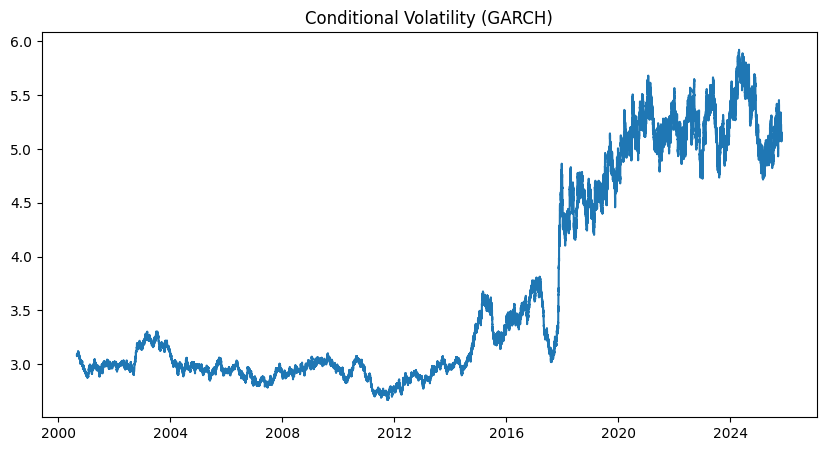

In [12]:
!pip install arch

from arch import arch_model

# Use log returns for volatility model
returns = series['log_ret']

# Fit GARCH(1,1)
garch = arch_model(returns, vol='GARCH', p=1, q=1)
garch_fit = garch.fit()

print(garch_fit.summary())

# Volatility Forecast
vol_forecast = garch_fit.forecast(horizon=30)
print("\n30-Day GARCH Volatility Forecast:\n")
print(vol_forecast.variance.tail())

# Plot volatility
plt.figure(figsize=(10,5))
plt.plot(garch_fit.conditional_volatility)
plt.title("Conditional Volatility (GARCH)")
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 72s 27ms/step - loss: 0.0128
Epoch 2/20
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 67s 27ms/step - loss: 0.0122
Epoch 3/20
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 65s 27ms/step - loss: 0.0123
Epoch 4/20
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 87s 29ms/step - loss: 0.0118
Epoch 5/20
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 69s 28ms/step - loss: 0.0118
Epoch 6/20
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - loss: 0.0123
Epoch 7/20
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 65s 27ms/step - loss: 0.0122
Epoch 8/20
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 65s 27ms/step - loss: 0.0118
Epoch 9/20
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 68s 28ms/step - loss: 0.0119
Epoch 10/20
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 64s 26ms/step - loss: 0.0120
Epoch 11/20
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 65s 27ms/step - loss: 0.0121
Epoch 12/20
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 65s 27ms/step - loss: 0.0119
Epoch 13/20
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 66s 27ms/step - loss: 0.0124
Epoch 14/20
2426/2426 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - loss: 0.0116
E

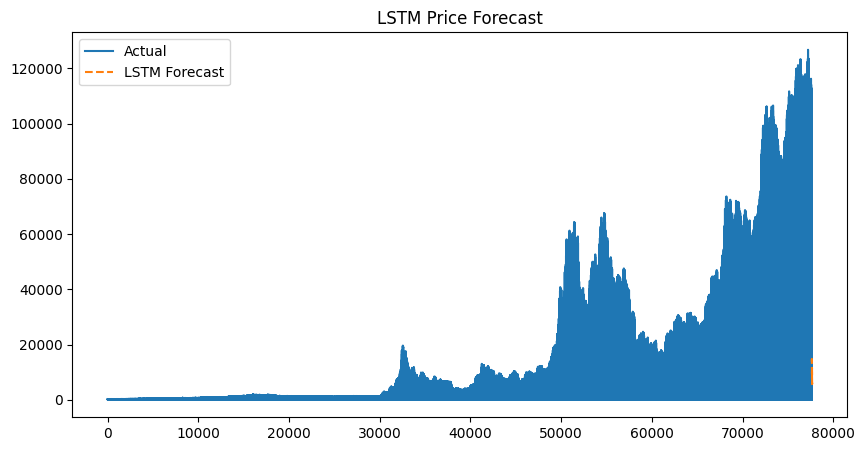

In [13]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

# Only price used for LSTM
data = series[[asset]].values

# Scale 0–1
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)

# Prepare sequences
X, y = [], []
window = 30  # lookback window

for i in range(window, len(scaled)):
    X.append(scaled[i-window:i, 0])
    y.append(scaled[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=20, batch_size=32)

# Predict next 30 days
last_30 = scaled[-30:]
future = []

current_input = last_30

for _ in range(30):
    pred = model.predict(current_input.reshape(1, 30, 1))
    future.append(pred[0, 0])
    current_input = np.vstack((current_input[1:], pred))

future_prices = scaler.inverse_transform(np.array(future).reshape(-1, 1))

print("\nLSTM 30-Day Forecast:\n")
print(future_prices)

# Plot
plt.figure(figsize=(10,5))
plt.plot(data, label="Actual")
plt.plot(range(len(data), len(data)+30), future_prices, label="LSTM Forecast", linestyle='--')
plt.legend()
plt.title("LSTM Price Forecast")
plt.show()


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Load your CSV
df = pd.read_csv("/content/multi_asset_market_data.csv", on_bad_lines='skip')

print(df.head())
print(df.info())

         date final_price   asset      7d_avg             30d_avg  \
0  2008-07-22     $948.00    gold  964.371425   920.6066670735676   
1  2006-03-20     $544.73    gold  553.832642   554.2257974042858   
2  2003-11-17     $391.50    gold  390.899998  382.07666829427086   
3  2006-04-28     $651.80    gold  632.499991   594.2333333333333   
4  2005-05-20       $6.93  silver    7.010429   7.083333317438761   

   daily_pct_change  volatility_7d  momentum_14d  trend_signal  price_zscore  
0         -0.015679      10.041208      5.500000           1.0      0.785980  
1          0.001924       5.383550     -6.477138           0.0      0.280029  
2         -0.015837       5.136470      8.299988           1.0      1.260717  
3          0.029212      10.939685     63.399963           1.0      1.930167  
4         -0.025983       0.104297      0.095000           0.0     -1.083492  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77645 entries, 0 to 77644
Data columns (total 10 columns):
 #

/tmp/ipython-input-2712713079.py:9: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/multi_asset_market_data.csv", on_bad_lines='skip')


In [17]:
df['target'] = (df['final_price'].shift(-1) > df['final_price']).astype(int)
df = df.dropna()


In [19]:
features = ['7d_avg', '30d_avg', 'volatility_7d', 'momentum_14d', 'daily_pct_change']

X = df[features]
y = df['target']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

knn_pred = knn.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred))
print(classification_report(y_test, knn_pred))


KNN Accuracy: 0.784330189897946
[[6124 1597]
 [1742 6019]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.79      7721
           1       0.79      0.78      0.78      7761

    accuracy                           0.78     15482
   macro avg       0.78      0.78      0.78     15482
weighted avg       0.78      0.78      0.78     15482



In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


Random Forest Accuracy: 0.9999354088619041
[[7720    1]
 [   0 7761]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7721
           1       1.00      1.00      1.00      7761

    accuracy                           1.00     15482
   macro avg       1.00      1.00      1.00     15482
weighted avg       1.00      1.00      1.00     15482



In [24]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))


Decision Tree Accuracy: 0.9999354088619041
[[7720    1]
 [   0 7761]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7721
           1       1.00      1.00      1.00      7761

    accuracy                           1.00     15482
   macro avg       1.00      1.00      1.00     15482
weighted avg       1.00      1.00      1.00     15482



In [26]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

log_pred = logreg.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print(confusion_matrix(y_test, log_pred))
print(classification_report(y_test, log_pred))


Logistic Regression Accuracy: 0.5399173233432373
[[1278 6443]
 [ 680 7081]]
              precision    recall  f1-score   support

           0       0.65      0.17      0.26      7721
           1       0.52      0.91      0.67      7761

    accuracy                           0.54     15482
   macro avg       0.59      0.54      0.46     15482
weighted avg       0.59      0.54      0.47     15482



In [27]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

nb_pred = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print(confusion_matrix(y_test, nb_pred))
print(classification_report(y_test, nb_pred))


Naive Bayes Accuracy: 0.4987081772380829
[[7721    0]
 [7761    0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      7721
           1       0.00      0.00      0.00      7761

    accuracy                           0.50     15482
   macro avg       0.25      0.50      0.33     15482
weighted avg       0.25      0.50      0.33     15482



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


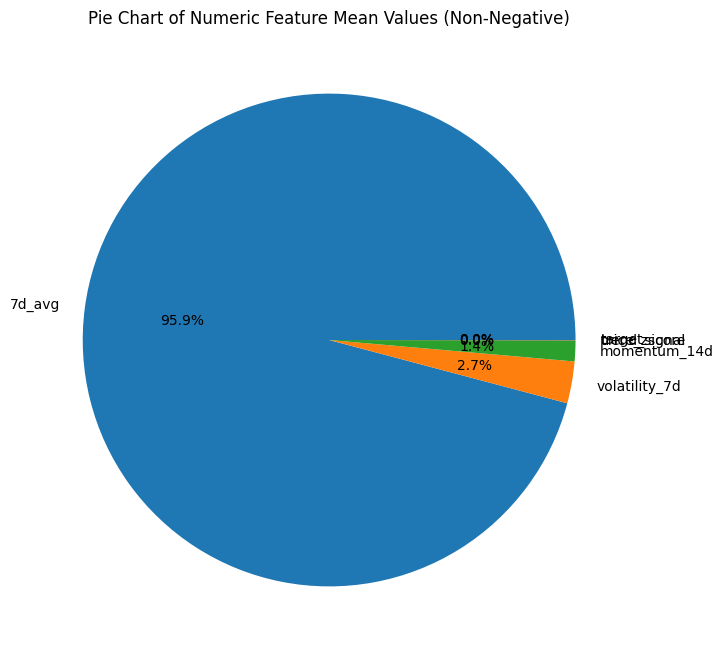

In [29]:
numeric_cols = df.select_dtypes(include='number').columns
mean_vals = df[numeric_cols].mean()

# Filter out negative mean values for the pie chart
positive_mean_vals = mean_vals[mean_vals >= 0]

plt.figure(figsize=(8,8))
plt.pie(positive_mean_vals, labels=positive_mean_vals.index, autopct='%1.1f%%')
plt.title("Pie Chart of Numeric Feature Mean Values (Non-Negative)")
plt.show()